<a href="https://colab.research.google.com/github/LeonVillanueva/CoLab/blob/master/Google_CoLab_LSTM_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q tensorflow==2.0.0-beta1

     |████████████████████████████████| 87.9MB 44kB/s 
     |████████████████████████████████| 3.1MB 39.1MB/s 
     |████████████████████████████████| 501kB 58.8MB/s 


In [0]:
%%capture
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [0]:
import math
import seaborn as sns

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [0]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, GaussianNoise, BatchNormalization, MaxPooling2D, SimpleRNN, GRU, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
X_train = X_train / np.max (X_train)
X_test = X_test / np.max (X_test)

In [0]:
T, D = X_train[0].shape

In [0]:
i = Input (shape=(T,D))
x = LSTM (128) (i)
x = Dense (10, activation='softmax') (x)

In [0]:
model = Model (i, x)

In [0]:
adam = tf.keras.optimizers.Adam (learning_rate=0.05, decay=5e-5)

In [0]:
model.compile (optimizer=adam,
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

In [0]:
epochs = 10

In [0]:
m = model.fit (X_train, y_train, epochs=epochs, verbose=False, validation_data=(X_test, y_test))

In [40]:
model.evaluate (X_test, y_test)

10000/10000 [==============================] - 6s 612us/sample - loss: 0.4129 - accuracy: 0.8749


[0.4129184242844582, 0.8749]

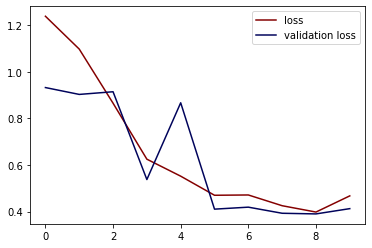

In [41]:
plt.plot (m.history['loss'], label='loss', color='#840000')
plt.plot (m.history['val_loss'], label='validation loss', color='#00035b')
plt.legend ()

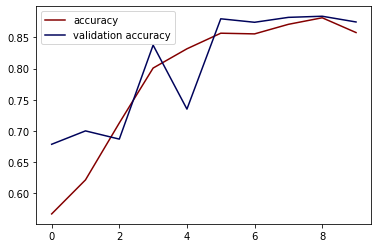

In [42]:
plt.plot (m.history['accuracy'], label='accuracy', color='#840000')
plt.plot (m.history['val_accuracy'], label='validation accuracy', color='#00035b')
plt.legend ()

In [0]:
y_pred = model.predict (X_test)

In [0]:
y_pred_class = []

for i in range (len (y_pred)):
  y_pred_class.append (np.argmax (y_pred[i]))

In [62]:
len (y_pred_class) == len (y_test)

True

In [0]:
con_mat = tf.math.confusion_matrix(labels=y_test, predictions=y_pred_class).numpy()

In [0]:
con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)

In [0]:
con_mat_df = pd.DataFrame(con_mat_norm)

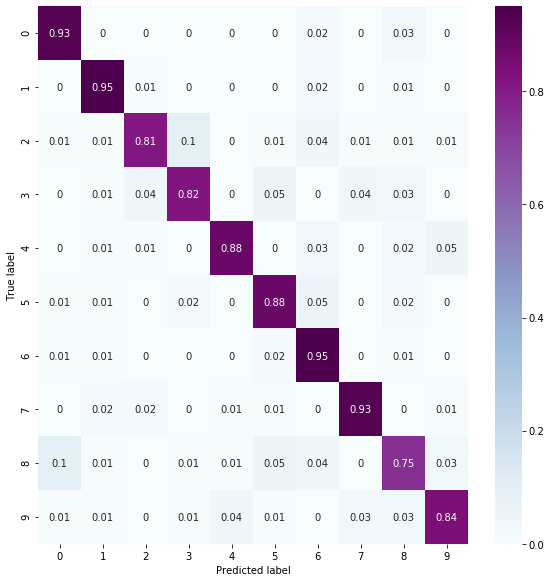

In [68]:
figure = plt.figure(figsize=(8, 8))
sns.heatmap(con_mat_df, annot=True, cmap=plt.cm.BuPu)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [0]:
misclass = np.where (y_pred_class != y_test)[0]

In [0]:
i = np.random.choice (misclass)

Text(0.5, 1.0, 'True: 2, Predicted: 3')

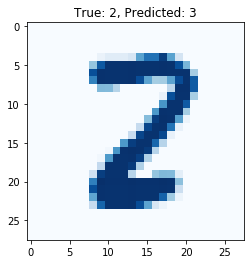

In [74]:
plt.imshow (X_test[i], cmap='Blues')
plt.title ('True: %s, Predicted: %s' % (y_test[i], y_pred_class[i]))